# Module II: Medical Data & Machine Learning

# Lecture 12 - Feature exaction and visualization

# By Cheng Peng & Yong Yang

————————————————————————————————————————————————————————————————

# 写在前面

各位同学大家下午好，这次课我们继续**Python**的学习。

首先感谢同学们提出的建议，我这边做了一些修改，但是可能还没能达到同学们的要求，所以希望同学们继续及时反馈。

本次课程的主要内容是学习**Python**中的特征提取与可视化（**Feature exaction and visualization**）。

关于特征提取，可以不太严格的简单理解为数据降维，虽然实际上有一定差别，但是两者的方法非常类似。

特征提取就是只选取最关键的那些特征，而忽略其他的冗余信息的影响和干扰，来让我们更专注于数据最显著的特点进行分析。

我们在**Lecture 10**中提到的主成分分析（**Principal Component Analysis，PCA**）算法就可以算做一种特征提取算法。

它保留了数据最主要的变化情况。

当然PCA是非监督学习算法，因为它对所有数据一视同仁，不考虑数据原本的分类情况。（你别管不同类别的数据是不是混一块了，你就说维数将没降下来吧)

但是在实际应用中，也存在需要考虑数据分类情况为前提的降维手段，我既要保留原来的数据集分类信息，同时还要降低数据集的维数。

我们这次提到的线性判别分析（**Linear Discriminant Analysis，LDA**）算法，就是解决这一类问题的其中一种方法。

————————————————————————————————————————————————————————————————

# 正式内容

本次课的内容主要包括三个方面：

（1）**LDA**的数学原理以及推导过程分析；

（2）**LDA**算法的**Python**代码实现（不调用**sklearn**只使用原始代码 / 调用**sklearn**工具包 分别实现）以及拆解分析；

（3）**LDA**方法的应用练习以及课后作业；

P.S.我们在前几节课中，也学习了其他的数学方法，包括回归（**Regression**），分类（**SVM**），降维（**PCA**，**LDA**）等等。

这些方法都是机器学习中比较常用的数学方法或者数学模型。

但是具体怎么用到机器学习中我这边讲的不好，所以同学们也普遍不是很满意。

在后面的练习中，我会尽量把课程内容和前面的内容关联起来，把这些方法在机器学习或者其他实际问题中发挥的作用展示给大家。

# 1-LDA的数学原理以及推导过程分析

## 我们首先描述一下需要解决的问题是什么样的。

问题描述：

简单概括来说，线性判别分析（**Linear Discriminant Analysis，LDA**）所需要解决的问题就是，怎么样对一个已经分好类的高维数据集S，在保证其分类情况不被打乱的前提下进行降维。

当然，描述中虽然说是分类不被打乱，但是我们在实际操作中更希望原本的分类在降维之后分的更“开”，同时同类的数据尽可能地更“集中”。

这更有利于数据的后续分析和处理，也即是说LDA想实现的是下图所示的效果：

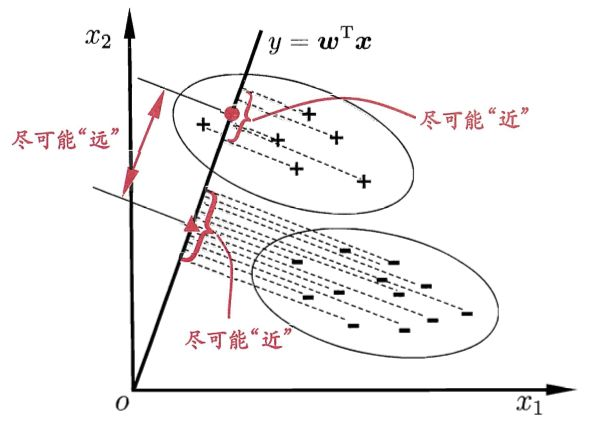

假设我们有两类数据分为 “$ + $”和“$ - $”，这些数据特征是二维的，而我们觉得二维数据处理起来太麻烦了，希望将这些数据投影到一维的一条直线上，同时我们还希望让每一种类别数据的投影点尽可能的接近，而“+”和“-”数据中心之间的距离尽可能的大。

这个时候我们就需要**LDA**了。

### 我们下面开始数学上的推导

#### 先把上面的问题用数学语言一步一步的表示出来：

首先是数据集的表示；

然后是投影的处理；

之后是“类间大，类内小”的限制条件；

最后是求解。

#### 数据集 $ S $

数据集 $ S $，是一个由 $ n $ 个 $ p $ 维向量 $ x^{N}_{i=1} $ 以及每个向量所对应的Label信息 $ y $ 所组成的集合
$$ 
\mathbf{S} = {\{}{(\mathbf{x_i},y_i)}{\}}^{N}_{i=1} 
$$   
其中
$$ 
\mathbf{x_i} \in R_p 
$$
为一个 $ p $ 维向量
$$    
\mathbf{x_i} =
  \left[ {\begin{array}{cc}
    a_{1i} \\
    a_{2i} \\
    a_{3i} \\
   \vdots   \\
    a_{pi} \\
  \end{array} } \right]
$$
其中 $ i $ 表示列，所以放在了后面，而$ y_i $ 
$$ 
y_i \in {\{}{+1,-1}{\}}
$$   
为一个实数，用于表示对应数据点的的Label信息。
        
注意：在不加说明的情况下，我们一般将列作为向量的第一默认维度，也就是一维向量一般都用列向量来表示。这主要是为了和数学公式对应，同时我们也会在程序中保持这个习惯，以方便检查和纠错。

数据集 $ \mathbf{S} $ 中，Label为+1的数据我们记作 $ \mathbf{C_1} $，而Label为-1的数据我们记作 $ \mathbf{C_2} $

那么就有
$$ 
\mathbf{C_1} = {\{}{\mathbf{x_i} \in S|y_i = +1}{\}}^{N_{C_1}}_{i=1} 
$$   
以及
$$ 
\mathbf{C_2} = {\{}{\mathbf{x_i} \in S|y_i = -1}{\}}^{N_{C_2}}_{i=1} 
$$   
其中$ N_{C_1} $ 与 $ N_{C_2} $ 分别表示 $ C_1 $ 以及 $ C_2 $ 中数据点的数目，那么显然有
$$ 
N_{C_1} + N_{C_2} = N 
$$    
以及
$$  
C_1 \cup  C_2 = S 
$$
和
$$  
C_1 \cap  C_2 = \phi 
$$
当然后面这几条我们其实用不到，但是还是列出来一下吧，主要是为了表明我们现在只分析分成两类的情况。
    
分两类的情况是最简单的，我们讨论问题总是从最简单的地方开始。
    
如果上面的条件不满足，那说明还有第三类的数据点，那时情况会复杂一些。

#### 投影

表示完了数据集，我们下面要处理投影的问题了。

一个 $ p $ 维数据点我们可以看作一个从 $ 0 $ 指向该点的 $ p $ 维向量。

而向量朝着某个方向的投影可以通过向量的点积（内积/标量积）来计算。

不妨设我们要投影的那个方向的单位向量为$ \mathbf{w} $，而 $ \mathbf{S} $ 中某个数据点 $ \mathbf{x_i} $ 投影之后的长度为$ z_i $

那么就有
$$ 
z_i = \mathbf{w^T}\mathbf{x_i} 
$$    
$ z_i $ 是一个标量，因为向量的点积一定是标量，所以是一个一维的实数。

#### 类间大，类内小

有了投影的表示，接下来就该处理“类间大，类内小”的限制条件了，注意，这里是投影之后的“类间大，类内小”。

所谓“类间大”指的是“投影后的两组数据尽可能分开”

我们这里用两组数据的中心点距离衡量两组数据的间距，其中

$ \mathbf{C_1} $ 的中心点：
$$ 
\bar{z}_1 = \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{z_i} 
$$
$ \mathbf{C_2} $ 的中心点：
$$ 
\bar{z}_2 = \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{z_i} 
$$
那么由“类间大”，就有：  
$$ 
\mathbf{w^*} = arg\mathop{max}_{w}(\bar{z}_1 - \bar{z}_2)^2 
$$    
所谓“类内小”指的是“投影后的数据中，属于同一组的尽可能集中”

描述一组数据的“分散”程度，可以用方差来表示，所以有：
    
$ \mathbf{C_1} $ 的方差：
$$ 
\mathbf{S_1} = \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{(z_i - \bar{z}_1)(z_i - \bar{z}_1)^T} 
$$   

$ \mathbf{C_2} $ 的方差：
$$ 
\mathbf{S_2} = \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{(z_i - \bar{z}_2)(z_i - \bar{z}_2)^T} 
$$
    
这里的 $ S_1 $ 和 $ S_2 $ 是两个非负标量，那么由“类内小”，就有：   
$$ 
\mathbf{w^*} = arg\mathop{min}_{\mathbf{w}} (S_1 + S_2) 
$$
    
这两个条件需要同时满足，所以我们将两个条件组合成一个函数 
$$ 
J(\mathbf{\mathbf{w}}) = \frac{(\bar{z}_1 - \bar{z}_2)^2}{(S_1 + S_2)}
$$ 
来求解   
$$ 
J(\mathbf{w}) = arg\mathop{max}_{\mathbf{w}}\frac{(\bar{z}_1 - \bar{z}_2)^2}{(S_1 + S_2)} 
$$
    
的极值问题
    
P.S. 关于“类间大”的这个问题，各位同学可以尝试着对比一下我们最后求得的投影方向$ w $ 和用**SVM**方法求得的最大似然超平面的法向量，看看之间有什么关系。

#### 求解

要求解这个极值问题，我们先对 
$$ 
J(\mathbf{w}) = \frac{(\bar{z}_1 - \bar{z}_2)^2}{(S_1 + S_2)} 
$$

进行化简

首先是分子项

$$
\begin{aligned}
(\bar{z}_1 - \bar{z}_2)^2 
                  &= {\LARGE[} \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{z_i} 
                          - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{z_i}{\LARGE]}^2 \\
                  &= {\LARGE[} \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{w^Tx_i}} 
                          - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{w^Tx_i}}{\LARGE]}^2  \\
                  &= {\LARGE[}\mathbf{w^T}(\frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}} 
                          - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}}){\LARGE]}^2  \\
                  &= [ \mathbf{w^T}(\mathbf{\bar{x}_{C_1}} 
                   -  \mathbf{\bar{x}_{C_2} )}]^2  \\
                  &=   \mathbf{w^T(\bar{x}_{C_1} - \bar{x}_{C_2})(\bar{x}_{C_1} - \bar{x}_{C_2})^Tw}  \\
                  &=   \mathbf{w^T}\mathbf{S_b}\mathbf{w}  \\
\end{aligned} 
$$
其中
$$
S_b = \mathbf{(\bar{x}_{C_1} - \bar{x}_{C_2})(\bar{x}_{C_1} - \bar{x}_{C_2})^T}
$$
是一个 $ n $ 维方阵

然后是分母项

$$ 
\begin{aligned}
S_1 + S_2 &= \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{(z_i - \bar{z}_1)(z_i - \bar{z}_1)^T}
        + \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{(z_i - \bar{z}_2)(z_i - \bar{z}_2)^T} \\
       &= \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{(\mathbf{w^Tx_i} - \bar{z}_1)(\mathbf{w^Tx_i} - \bar{z}_1)^T}
        + \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{(\mathbf{w^Tx_i} - \bar{z}_2)(\mathbf{w^Tx_i} - \bar{z}_2)^T} \\
       &= \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}
       {(\mathbf{w^Tx_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{z_i})
        (\mathbf{w^Tx_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{z_i}})^T
        + \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}
       {(\mathbf{w^Tx_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{z_i})
        (\mathbf{w^Tx_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{z_i})^T} \\  
       &= \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}
       {(\mathbf{w^Tx_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{w^Tx_i}})
        (\mathbf{w^Tx_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{w^Tx_i}}})^T 
        + \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}
       {(\mathbf{w^Tx_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{w^Tx_i}})
        (\mathbf{w^Tx_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{w^Tx_i}})^T} \\
       &= \mathbf{w^T}\frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}
       (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})
       (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})^T\mathbf{w}
        + \mathbf{w^T}\frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}
       (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})
       (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})^T\mathbf{w} \\
       &= \mathbf{w^T}{\Large(}\frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}
       (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})
       (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})^T
         + \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}
       (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})
       (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})^T{\Large)}\mathbf{w}   \\
       &= \mathbf{w^T}\mathbf{(S_{C_1} + S_{C_2})}\mathbf{w} \\                                    
\end{aligned}
$$
          
其中
$$
S_{C_1} = \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}(\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})
                                 (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})^T
$$
而
$$
S_{C_2} = \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}(\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})
                                 (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})^T
$$

都是 $ p $ 维方阵

最终我们得到
$$ 
J(\mathbf{w}) = \frac{\mathbf{w^TS_bw}}{\mathbf{w^TS_ww}} 
$$

或者
$$ 
J(\mathbf{w}) = \frac{\mathbf{w^TS_bw}}{\mathbf{w^TS_ww}} = (\mathbf{w^TS_bw})(\mathbf{w^TS_ww})^{-1} 
$$

其中

$$ 
\mathbf{S_w} = \mathbf{(S_{C_1} + S_{C_2})} 
$$

因为$ J(\mathbf{w}) $ 是一个没有限制条件，自变量为 $ \mathbf{w} $ 的标量函数，因此求极值的必要条件是各个偏导数为0

$ J(\mathbf{w}) $的分子分母都是二次型函数，而且我们不会把数据往0向量上投影，所以在这里就没有考虑是否可导的问题，虽然严格意义上来说是需要证明的。

所以我们有：

$$
\begin{aligned}
\frac{\partial{J(\mathbf{w})}}{\partial{\mathbf{w}}} 
                         &= 2\mathbf{S_bw((w^TS_ww)}^{-1}) 
                          + 2\mathbf{(w^TS_bw)}(-1)\mathbf{((w^TS_ww)}^{-2})\mathbf{S_ww} \\
                         &= \mathbf{ S_bw(w^TS_ww)}^{-1}
                          - \mathbf{(w^TS_bw)S_ww}  \\
                         &= \mathbf{0}
\end{aligned}
$$
所以有
$$
\mathbf{S_ww} = \frac{ \mathbf{w^TS_ww}}
               { \mathbf{w^TS_bw}}
                \mathbf{S_bw}
$$

矩阵左乘，展开$ \mathbf{S_b} $：

$$
\mathbf{w^*} = \mathbf{S_w^{-1}\frac{w^TS_ww}{w^TS_bw}(\bar{x}_{C_1} - \bar{x}_{C_2})(\bar{x}_{C_1} - \bar{x}_{C_2})^Tw}
$$

然后根据矩阵结合律：

$$
\mathbf{w^*} = \mathbf{S_w^{-1}[\frac{w^TS_ww}{w^TS_bw}](\bar{x}_{C_1} - \bar{x}_{C_2})[(\bar{x}_{C_1} - \bar{x}_{C_2})^Tw]}
$$
因为方括号内都是标量

最后有：
$$
\mathbf{w^*} = \mathbf{[\frac{w^TS_ww}{w^TS_bw}*(\bar{x}_{C_1} - \bar{x}_{C_2})^Tw]S_w^{-1}(\bar{x}_{C_1} - \bar{x}_{C_2})}
$$

说明 $ \mathbf{w^*} $ 与 $ \mathbf{S_w^{-1}(\bar{x}_{C_1} - \bar{x}_{C_2})} $ 方向一致。

所以，针对上述问题，我们可以先求
$$
\mathbf{S_w^{-1}}\mathbf{(\bar{x}_{C_1} - \bar{x}_{C_2})} 
$$ 
再将其长度变换为1即可得到$ \mathbf{w^*} $，但是此时我们只能得到一个向量，有时我们需要向不止一维方向上投影，所以实际使用的时候一般都用下面的方法：

回到
$$
\mathbf{S_ww} = \mathbf{\frac{w^TS_ww}{w^TS_bw}S_bw}
$$

显然$ \mathbf{w^TS_ww} $ 和 $ \mathbf{w^TS_bw} $都是标量，因此

$$
\mathbf{\frac{w^TS_ww}{w^TS_bw}}
$$

也是标量，不妨设
$$
\mathbf{\frac{w^TS_ww}{w^TS_bw}} = \frac{1}{\lambda}
$$

那么我们有
$$
\begin{aligned}
      \mathbf{S_ww} &= \frac{1} 
{\lambda}\mathbf{S_bw} \\
{\lambda}\mathbf{S_ww} &= \mathbf{S_bw} \\
{\lambda}\mathbf{w}   &= \mathbf{S_w^{-1}S_bw} \\
\end{aligned}
$$
这显然是一个特征值问题，所以也可以通过特征值来求解。

## 1-小结

其中的关键公式：

$$
S_b = \mathbf{(\bar{x}_{C_1} - \bar{x}_{C_2})(\bar{x}_{C_1} - \bar{x}_{C_2})^T}
$$

$$ 
\mathbf{S_w} = \mathbf{(S_{C_1} + S_{C_2})} 
$$

其中

$$
S_{C_1} = \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}(\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})
                                 (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})^T
$$
而
$$
S_{C_2} = \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}(\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})
                                 (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})^T
$$

$$
{\lambda}\mathbf{w} = \mathbf{S_w}^{-1}\mathbf{S_bw} 
$$
显然，我们能看到，这里面用到了前面讲解的一些方法或者工具，比如：

**<center>numpy库中的np.linalg.eig() 或者 np.linalg.svd()**
    
用来求特征值
    
以及
    
**<center>np.lexsort()等命令**
        
用来对特征值进行排序。
    
或者

**<center>scipy库中的scipy.linalg.null_space()**

    
来根据特征值求取对应的特征向量。
    
以上函数的具体用法我们在前面的例子中讲过了，这里就不啰嗦了，忘记用法的同学可以去前面的课件中查看一下。

那么下面我们就来试试看，看看我们上面的这些理解是不是对的。

按照我们上面的思路，能不能解决保留分类情况的同时降维的问题，结论和标准工具包的结论是不是一致的。

## 1-补充

关于矩阵以及向量求导，各位同学可以参考这篇帖子：

https://zhuanlan.zhihu.com/p/263777564 

以及 

https://zhuanlan.zhihu.com/p/273729929

原帖很长，内容也很多，不太可能在这里一一展示其内容，所以这里只简单介绍一下向量求导，因为以上推导过程只用到了向量求导。

考虑这样一个函数：

$$ 
function(input) 
$$

当 $ Input $ 是一个向量，而 $ function $ 是一个标量（也就是我们上面例子中最常见的一种情况），比如：

$$ 
\begin{aligned}
f(\mathbf{x})  &= \mathbf{x^TAx} \\
           &= x^{2}_{i} + x_1x_2 + x_2x_3
\end{aligned}
$$

其中

$$    
\mathbf{x} =
  \left[ {\begin{array}{c}
    x_{1} \\
    x_{2} \\
    x_{3} \\
  \end{array} } \right]
$$

而 

$$    
\mathbf{A} =
\begin{bmatrix}
{1}&{1}&{0}\\
{0}&{0}&{1}\\
{0}&{0}&{0}\\
\end{bmatrix}
$$

显然，对于 $ f(\mathbf{x}) $ 我们可以求出它的偏导数

$$  
\begin{aligned}  
    \frac{\partial{f}}{\partial{x_1}} &= 2x_1 + x_2 \\
    \frac{\partial{f}}{\partial{x_2}} &=  x_1 + x_3 \\
    \frac{\partial{f}}{\partial{x_3}} &=  x_2\\
\end{aligned}
$$

矩阵求导也是一样的，本质就是 $ function $ 中的每个 $ f $ 分别对变元中的每个元素逐个求偏导，只不过写成了向量、矩阵形式而已。

我们把得出的3个结果写成列向量形式：

$$    
  \left[ {\begin{array}{c}
    \frac{\partial{f}}{\partial{x_1}} \\
    \frac{\partial{f}}{\partial{x_2}} \\
    \frac{\partial{f}}{\partial{x_3}} \\
  \end{array} } \right]
  =
    \left[ {\begin{array}{c}
    2x_1 + x_2 \\
     x_1 + x_3 \\
     x_2 \\
  \end{array} } \right]
$$

一个矩阵求导以列向量形式展开的雏形就出现了。

当然我们也可以以行向量形式展开：
$$
\frac{\partial{f(\mathbf{x})}}{\partial{\mathbf{x^{T}_{3\times1}}}} 
    =   
    \left[ {\begin{array}{c}
    \frac{\partial{f}}{\partial{x_1}},
    \frac{\partial{f}}{\partial{x_2}},
    \frac{\partial{f}}{\partial{x_3}}
    \end{array} } \right]
    =
    \left[ {\begin{array}{c}
    2x_1 + x_2,
     x_1 + x_3,
     x_2
    \end{array} } \right]
$$

所以，如果 $ function $  中有 $ m $ 个 $ f $ 分量 ，变元中有 $ n $ 个元素，那么，每个 $ f $ 对变元中的每个元素逐个求偏导后，我们就会产生 $ m \times n $ 个结果。

至于这 $ m \times n $ 个结果的布局，是写成行向量，还是写成列向量，还是写成矩阵，就是我们接下来要讨论的事情。

常见的布局有两种，分别叫分子布局与分母布局。

分子布局，就是分子是列向量形式，分母是行向量形式：
$$
\frac{\mathbf{f_{2\times1}}(\mathbf{x})}{\mathbf{x^{T}_{3\times1}}} 
    =   
    \left[ {\begin{array}{ccc}
    \frac{\partial{f_1}}{\partial{x_1}},
    \frac{\partial{f_1}}{\partial{x_2}},
    \frac{\partial{f_1}}{\partial{x_3}} \\
    \frac{\partial{f_2}}{\partial{x_1}},
    \frac{\partial{f_2}}{\partial{x_2}},
    \frac{\partial{f_2}}{\partial{x_3}}
    \end{array} } \right]_{2\times3}
$$
简单概括一下就是“行按分母来，列按分子来”——列按照分子的列向量方向排序，行按照分母的行向量方向排序：
$$
\begin{array}{c|lll}
{↓}&{x_1}&{x_2}&{x_3}\\
\hline
{f_1}&{\frac{\partial{f_1}}{\partial{x_1}}}&{\frac{\partial{f_1}}{\partial{x_2}}}&{\frac{\partial{f_1}}{\partial{x_3}}}\\
{f_2}&{\frac{\partial{f_2}}{\partial{x_1}}}&{\frac{\partial{f_2}}{\partial{x_2}}}&{\frac{\partial{f_2}}{\partial{x_3}}}\\
\end{array}
$$
同样的，分母布局就是反过来：
$$
\frac{\partial{\mathbf{f^{T}_{2\times1}}(\mathbf{x})}}{\partial{\mathbf{x_{3\times1}}}} 
    =   
    \left[ {\begin{array}{cc}
    \frac{\partial{f_1}}{\partial{x_1}}, \frac{\partial{f_2}}{\partial{x_1}} \\
    \frac{\partial{f_1}}{\partial{x_2}}, \frac{\partial{f_2}}{\partial{x_2}} \\
    \frac{\partial{f_1}}{\partial{x_3}}, \frac{\partial{f_2}}{\partial{x_3}} \\  
    \end{array} } \right]_{3\times2}
$$
简单概括一下就是“列按分母来，行按分子来”：
$$
\begin{array}{c|ll}
{↓}&{f_1}&{f_2} \\
\hline
{x_1}&{\frac{\partial{f_1}}{\partial{x_1}}}&{\frac{\partial{f_2}}{\partial{x_1}}} \\
{x_2}&{\frac{\partial{f_1}}{\partial{x_2}}}&{\frac{\partial{f_2}}{\partial{x_2}}} \\
{x_2}&{\frac{\partial{f_1}}{\partial{x_3}}}&{\frac{\partial{f_2}}{\partial{x_3}}} \\
\end{array}
$$

这时，如果有
$$ 
\begin{aligned}
f(\mathbf{x})  &= \mathbf{x^TAx} \\
\end{aligned}
$$

因为$ f $是一个标量，相当于$ 1\times1 $的矩阵，所以就有 
$$
\frac{\partial{f(\mathbf{x})}}{\partial{\mathbf{x}}} =
\begin{array}{c|l}
{↓}&{f} \\
\hline
{x_1}&{\frac{\partial{f}}{\partial{x_1}}} \\
{x_2}&{\frac{\partial{f}}{\partial{x_2}}} \\
{x_2}&{\frac{\partial{f}}{\partial{x_3}}} \\
\end{array}
$$

向量以及矩阵求导的一些常用公式：

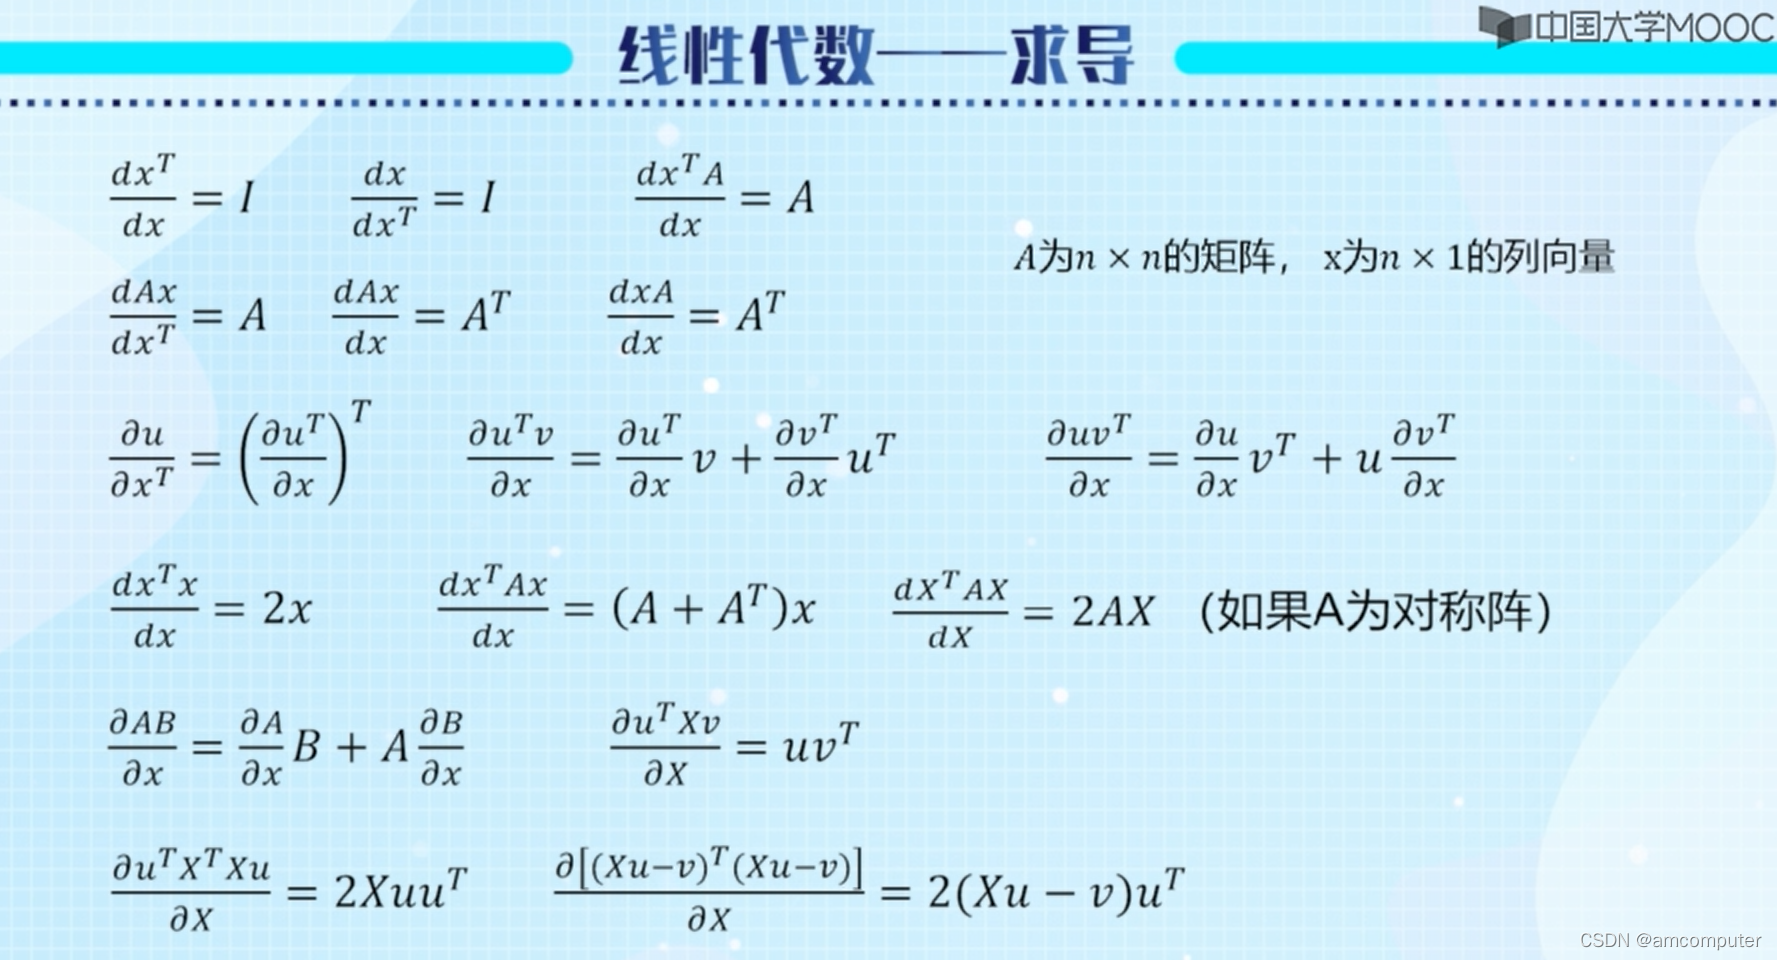

上面这些公式都可以通过矩阵乘法展开的方式推导，各位同学可以用一些低纬度的矩阵测试一下。

但是这里有一个疑问，就是这个公式
$$
\frac{\partial{\mathbf{u^Tv}}}{\partial{\mathbf{x}}} 
= 
\frac{\partial{\mathbf{u^T}}}{\partial{\mathbf{x}}}\mathbf{v}
+ 
\frac{\partial{\mathbf{v^T}}}{\partial{\mathbf{x}}}\mathbf{u^T}
$$

我们这里自己测试一下，不妨设
$$
\mathbf{u} = 
\begin{bmatrix}
{f_1}\\
{f_2}\\
{f_3}\\
\end{bmatrix}
\space
\space
\space
\mathbf{v} = 
\begin{bmatrix}
{g_1}\\
{g_2}\\
{g_3}\\
\end{bmatrix}
$$

其中的$ f $ 和$ g $ 都是关于向量
$$
\mathbf{x} =
\begin{bmatrix}
{x_1}\\
{x_2}\\
{x_3}\\
\end{bmatrix}
$$

的多元函数，那么就有
$$
\frac{\partial{\mathbf{u^Tv}}}{\partial{\mathbf{x}}} 
= 
\begin{bmatrix}
 {\frac{\partial{f_1}}{\partial{x_1}}g_1 + \frac{\partial{f_2}}{\partial{x_1}}g_2 + \frac{\partial{f_3}}{\partial{x_1}}g_3 
+ \frac{\partial{g_1}}{\partial{x_1}}f_1 + \frac{\partial{g_2}}{\partial{x_1}}f_2 + \frac{\partial{g_3}}{\partial{x_1}}f_3 } \\
 {\frac{\partial{f_1}}{\partial{x_2}}g_1 + \frac{\partial{f_2}}{\partial{x_2}}g_2 + \frac{\partial{f_3}}{\partial{x_2}}g_3 
+ \frac{\partial{g_1}}{\partial{x_2}}f_1 + \frac{\partial{g_2}}{\partial{x_2}}f_2 + \frac{\partial{g_3}}{\partial{x_2}}f_3 } \\
 {\frac{\partial{f_1}}{\partial{x_3}}g_1 + \frac{\partial{f_2}}{\partial{x_3}}g_2 + \frac{\partial{f_3}}{\partial{x_3}}g_3 
+ \frac{\partial{g_1}}{\partial{x_3}}f_1 + \frac{\partial{g_2}}{\partial{x_3}}f_2 + \frac{\partial{g_3}}{\partial{x_3}}f_3 } \\
\end{bmatrix}
$$

改写为矩阵形式，就有

$$
\frac{\partial{\mathbf{u^Tv}}}{\partial{\mathbf{x}}}=
\begin{bmatrix}
{\frac{\partial{f_1}}{\partial{x_1}} \space \frac{\partial{f_2}}{\partial{x_1}} \space \frac{\partial{f_3}}{\partial{x_1}}}\\
{\frac{\partial{f_1}}{\partial{x_2}} \space \frac{\partial{f_2}}{\partial{x_2}} \space \frac{\partial{f_3}}{\partial{x_2}}}\\
{\frac{\partial{f_1}}{\partial{x_3}} \space \frac{\partial{f_2}}{\partial{x_3}} \space \frac{\partial{f_3}}{\partial{x_3}}}\\
\end{bmatrix}
\begin{bmatrix}
{g_1}\\
{g_2}\\
{g_3}\\
\end{bmatrix}
+
\begin{bmatrix}
{\frac{\partial{g_1}}{\partial{x_1}} \space \frac{\partial{g_2}}{\partial{x_1}} \space \frac{\partial{g_3}}{\partial{x_1}}}\\
{\frac{\partial{g_1}}{\partial{x_2}} \space \frac{\partial{g_2}}{\partial{x_2}} \space \frac{\partial{g_3}}{\partial{x_2}}}\\
{\frac{\partial{g_1}}{\partial{x_3}} \space \frac{\partial{g_2}}{\partial{x_3}} \space \frac{\partial{g_3}}{\partial{x_3}}}\\
\end{bmatrix}
\begin{bmatrix}
{f_1}\\
{f_2}\\
{f_3}\\
\end{bmatrix}
$$

显然，后一项的$ \mathbf{u} $好像不应该有转置符号，可是我查了很多资料，公式都是这个公式，这个地方时我比较有疑问的地方。

不过这不影响本次课的结论，所以就简单提一提。

————————————————————————————————————————————————————————————————

# 2-LDA算法的Python代码实现

好了，数学公式应该够多了，我们看看代码吧。

在实际应用中，如果需要用到LDA算法对数据进行降维或者分析，我们第一时间肯定是会采用sklearn工具包中的LatentDirichletAllocation库：

**<center>from sklearn.discriminant_analysis import LinearDiscriminantAnalysis**
    
但是为了加深数学上的理解，我这里还是比较顽固的保留了用原始代码实现LDA的过程，毕竟能看懂和能做到还是不太一样的。

自己用原始代码实现一遍对于我们在实际应用的情境中找问题、Debug也有一定帮助，毕竟实际应用的情况比我们课堂上演示的要复杂得多。

当然，后面还是会有如何调用工具包的演示，但是在这之前，我们还是先自己实现一下看看。

首先我们还是先从最简单的情况开始讨论，也就在二维情况下 
$$ p =2 $$ 
而$ \mathbf{C_1} $ 和 $ \mathbf{C_2} $中都只有一个数据点的时候

即
$$ 
\mathbf{C_1} = {\{}{\mathbf{x_i} \in S|y_i = +1}{\}}^{N_{C_1}=1}_{i=1} 
$$   
以及
$$ 
\mathbf{C_2} = {\{}{\mathbf{x_i} \in S|y_i = -1}{\}}^{N_{C_2}=1}_{i=1} 
$$  
可以预见这个时候的$ w^* $ 就是$ \mathbf{x_1} \in \mathbf{C_1} $ 和 $ \mathbf{x_2} \in \mathbf{C_2}$ 连线方向的单位矢量

但是只有一个点的时候类内方差是0

$$
S_{C_1} = \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}(\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})
                                 (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})^T
$$

$$
S_{C_2} = \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}(\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})
                                 (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})^T
$$

不能用上面提到的公式来处理，不过这种情况过于简单，实在没必要单独列出作为一种情况来处理，在实际应用中也不太可能遇得到。

因为类内方差是0，所以这个时候就不用考虑“类内小”的问题了，只要考虑“类间大”，而平行投影肯定是最大的。

所以两类数据中的一类至少得包含两个数据点才能使用上面的公式。

但是如果只有两个点也是不行的，因为只有两个点的时候，类内方差矩阵 $ \mathbf{S_{C_1}} $ 和 $ \mathbf{S_{C_1}} $ 必然不满秩，也就没有逆矩阵，上面的公式依然不成立。

造成这个现象的原因是，此时，同一类数据集中的两个数据点$ \mathbf{x_1} $ 和 $ \mathbf{x_2} $，必然和数据集的中心 $ \mathbf{x_C} $ 在一条直线上，也就是说

$$
\mathbf{x_1} - \mathbf{x_C}
$$

必定可以由

$$
\mathbf{x_2} - \mathbf{x_C}
$$

线性表出，而且矩阵相乘秩不增加，所以对于数据维数$ p = 2 $的情况，如果只有两个数据点$ n = 2$，那么类内方差矩阵必然不满秩。

为了解决这个问题，两组数据中的一组，需要包含至少三个不共线的数据点。

在维数比较少的情况下，这种问题基本不存在，毕竟一组数据就几个点，谁还不清楚咋分类呢？

但是在维数比较高的情况下，情况可能就比价麻烦了。

比如我们要分析维数$ p = 100 $的数据，但是我们的数据集$ S_{C_1} $或$ S_{C_2} $中只有$ 99 $组，而这$ 99 $组又“恰好”彼此线性无关。

$ 99 $组数据，似乎不是$ 1-2 $组那么少了，但是我们还是没法直接用上面的公式来计算。

当然这个例子比较极端，我们平时不太可能遇到这种情况，而且数据这种东西，几乎可以说是取之不尽用之不竭的，再多弄些数据总能满足要求。

但是这种情况既然可能存在，我们也想到了，那还是准备一下对策比较好，而且多想想，对我们的理解也有帮助。

毕竟凡事须得研究，才能明白。

我这边请教了一些专门做机器学习的同学，他们给出的建议是，如果真的遇到了这种情况，可以用PCA对所有数据

$$
\mathbf{S_{C_1}} \cup \mathbf{S_{C_2}}
$$

进行降维，然后再使用LDA，不然LDA没法直接处理这种病态数据。

不过我们现在先不考虑这些令人头疼的问题，我们把二维情况弄明白先。

还是和以前一样，我们先自己生成数据看看。

In [60]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# 产生数据点，注意用列向量形式，以保证和数学公式习惯一致，方便检查
# C1集合
C1 = np.zeros((2, 1))
C1 = np.mat(C1)
C1[:, 0] = np.mat([[3.0], [7.0]])
# C2集合（点数至少三个，我们这里弄了四个）
C2 = np.zeros((2, 4))
C2 = np.mat(C2)
C2[:, 0] = np.mat([[7.0], [3.0]]) - 0.5
C2[:, 1] = np.mat([[7.0], [3.0]]) + 0.5
C2[:, 2] = np.mat([[7.0 - 0.5], [3.0 + 0.5]])
C2[:, 3] = np.mat([[7.0 + 0.5], [3.0 - 0.5]])

print('C1')
print(C1)
print('C2')
print(C2)

C1
[[3.]
 [7.]]
C2
[[6.5 7.5 6.5 7.5]
 [2.5 3.5 3.5 2.5]]


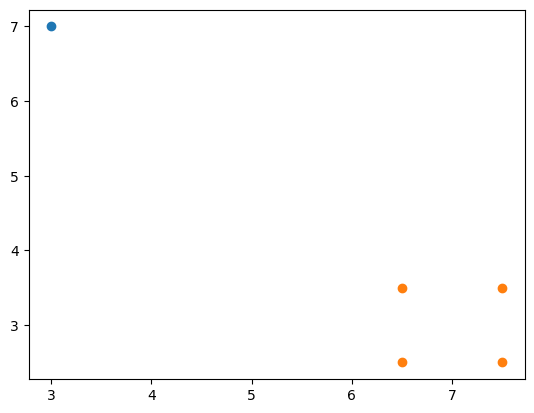

In [62]:
# 显示
plt.figure()
plt.scatter(np.array(C1[0, 0]), np.array(C1[1, 0]))
plt.scatter(np.array(C2[0, :]), np.array(C2[1, :]))
plt.show()

In [63]:
# 计算参数
N_C1 = C1.shape[1]
N_C2 = C2.shape[1]

print('N_C1 = '+ str(N_C1))
print('N_C2 = '+ str(N_C2))

N_C1 = 1
N_C2 = 4


In [64]:
# 计算C1和C2的均值
x_C1 = np.sum(C1, axis=1)/N_C1
x_C2 = np.sum(C2, axis=1)/N_C2

print('x_C1')
print(x_C1)
print('x_C2')
print(x_C2)

x_C1
[[3.]
 [7.]]
x_C2
[[7.]
 [3.]]


计算 $ \mathbf{S_{C_1}} $ 和 $ \mathbf{S_{C_2}} $

其中
$$
\mathbf{S_{C_1}} = \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}
             (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})
             (\mathbf{x_i} - \frac{1}{N_{C_1}}\sum_{i=0}^{N_{C_1}}{\mathbf{x_i}})^T
$$
而
$$
\mathbf{S_{C_2}} = \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}
             (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})
             (\mathbf{x_i} - \frac{1}{N_{C_2}}\sum_{i=0}^{N_{C_2}}{\mathbf{x_i}})^T
$$
都是 $ p $ 维方阵，$ p $ 是数据的维数。

In [65]:
# 计算S_c1和S_c1
S_C1 = np.zeros([C1.shape[0], C1.shape[0], N_C1])
for i in range(0, N_C1):
    S_C1[:, :, i] = np.dot((C1[:, i] - x_C1), (C1[:, i] - x_C1).T)
S_C2 = np.zeros([C2.shape[0], C2.shape[0], N_C2])
for j in range(0, N_C2):
    S_C2[:, :, j] = np.dot((C2[:, j] - x_C2), (C2[:, j] - x_C2).T)
S_C1 = np.sum(S_C1, axis=2)/N_C1
S_C2 = np.sum(S_C2, axis=2)/N_C2

print('S_C1')
print(S_C1)
print('S_C2')
print(S_C2)

S_C1
[[0. 0.]
 [0. 0.]]
S_C2
[[0.25 0.  ]
 [0.   0.25]]


In [66]:
# 计算S_b和S_w
S_b = np.dot((x_C1 - x_C2), (x_C1 - x_C2).T)
S_w = S_C1 + S_C2

print('S_b')
print(S_b)
print('S_w')
print(S_w)

S_b
[[ 16. -16.]
 [-16.  16.]]
S_w
[[0.25 0.  ]
 [0.   0.25]]


In [67]:
# 计算(S_w)^(-1)*S_b
S = np.dot(np.linalg.inv(S_w), S_b)

# 特征值分解
eig_val, eig_vec = np.linalg.eig(S)

print(eig_val)
print(eig_vec)

[128.   0.]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


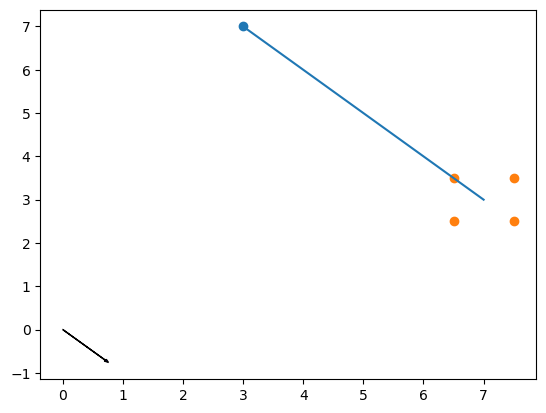

In [68]:
# 输出数据
plt.figure()
ax = plt.axes()
ax.arrow(0, 0, eig_vec[0, 0], eig_vec[1, 0], length_includes_head=False,head_width=0.05, fc='b', ec='k')
plt.plot(x_C1, x_C2)
plt.scatter(np.array(C1[0, 0]), np.array(C1[1, 0]))
plt.scatter(np.array(C2[0, :]), np.array(C2[1, :]))
plt.show()

显然，我们生成数据的时候是特意沿着
$$
x + y = 10
$$

这条直线的，我们最终得到的投影方向应该与它平行，我们的特征向量就也确实是沿着这个方向的。

似乎是对的，至少符合我们的直观猜测。

但是为了稳妥，我们再用标准的工具包检查一遍，看看结果是否有差异。

在**sklearn**工具包中调用**LDA**功能：

**LinearDiscriminantAnalysis**的用法大概是这样的

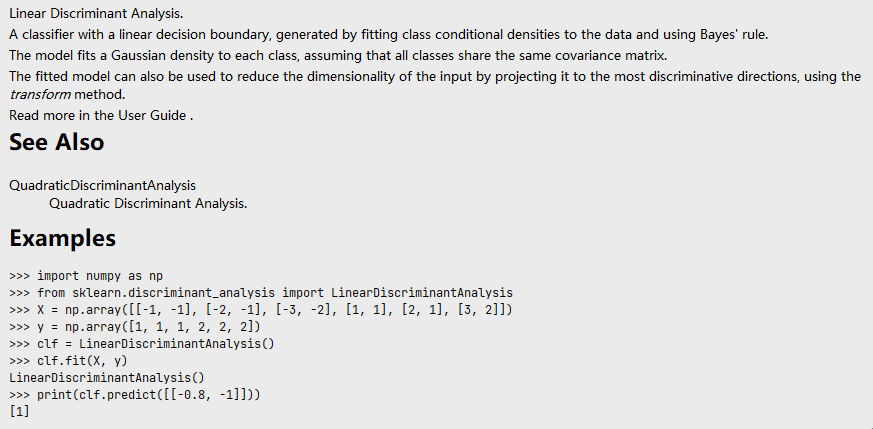

In [69]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 将C1和C2合并为数据集X
C = np.hstack((C1, C2))
X = np.asarray(C.T)
y = np.array([1, 2, 2, 2, 2])

# 创建LDA模型
lda = LinearDiscriminantAnalysis()
X_r = lda.fit(X,y)

# 输出
print(X_r.coef_)

[[ 12. -12.]]


输出结果是向量

$$
\mathbf{w} =
  \left[ {\begin{array}{c}
    12 \\
   - 12 \\
\end{array} } \right]
$$

和我们求得的向量

$$
\mathbf{w} =
  \left[ {\begin{array}{c}
    0.70710678 \\
   - 0.70710678 \\
\end{array} } \right]
$$

是指向同一个方向的向量，从上面的对比结果来看，我们的思路以及程序确实是对的

P.S. 虽然我们前边强调了数据尽量以列向量方式存放，但是对于**LinearDiscriminantAnalysis**工具包来说，似乎是将一行作为一组数据，所以我们才需要对数据集S进行转置。这个是编程习惯的问题，但是还是提一下。

还有，我自己在这里编程的时候遇到了一个有关**np.array**和**np.mat**的错误

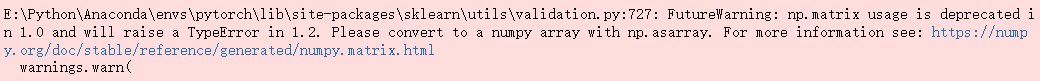

所以才加了这一句**X = np.asarray(S.T).**

上节课有同学问关于**np.array**和**np.mat**的问题，我这里主要是想避免一维**np.array**转置起来很麻烦的事情才用的**np.mat.**

但是现在看来**np.array**更不容易出问题，不过两者其实很方便转换，所以问题应该也不太大。

涉及维数操作的时候转**np.mat**然后再转回**np.array**应该不会引起什么问题。

这里再介绍一下**LinearDiscriminantAnalysis**的返回参数。

我们自己编写的程序只是用来求投影方向的，而**Python**的**sklearn**工具包中集成的**LinearDiscriminantAnalysis**包功能更强大。

我自己编写的例子情况过于简单，所以很多参数没用上，但是这些参数在实际应用中是完全可能用到的，所以在这里列出来。

————————————————————————————————————————————————————————————————

#### LinearDiscriminantAnalysis包的形式参数以及格式如下：

class sklearn.discriminant_analysis.LinearDiscriminantAnalysis

(

solver='svd',   
        
shrinkage=None,   
        
priors=None,     
        
n_components=None,   
        
store_covariance=False,  
        
tol=0.0001
        
)

————————————————————————————————————————————————————————————————

##### 参数：

**solver：一个字符串，指定了求解最优化问题的算法，可以为如下的值**。

'svd'：奇异值分解。对于有大规模特征的数据，推荐用这种算法。

'lsqr'：最小平方差，可以结合skrinkage参数。

'eigen' ：特征分解算法，可以结合shrinkage参数。

**skrinkage：字符串 'auto' 或者 浮点数 或者 None。该参数通常在训练样本数量小于特征数量的场合下使用。该参数只有在solver=lsqr或者eigen下才有意义**

'字符串‘auto’：根据Ledoit-Wolf引理来自动决定shrinkage参数的大小。

'None：不使用shrinkage参数。

浮点数（位于0~1之间）：指定shrinkage参数。

**priors：一个数组，数组中的元素依次指定了每个类别的先验概率。如果为None，则认为每个类的先验概率都是等可能的**。

**n_components：一个整数。指定了数组降维后的维度（该值必须小于n_classes-1）**。

**store_covariance：一个布尔值。如果为True，则需要额外计算每个类别的协方差矩阵**。

**warm_start：一个布尔值。如果为True，那么使用前一次训练结果继续训练，否则从头开始训练**。

**tol：一个浮点数。它指定了用于SVD算法中评判迭代收敛的阈值**。

————————————————————————————————————————————————————————————————

##### 返回值

**coef_：权重向量(Weight vector(s)，就是我们求的$ \mathbf{w^*} $)**。

**intercept：b值(我的理解是截距，英文原文是Intercept term，翻译过来似乎就是截距值，但是我们只讲了求$ \mathbf{^w*} $))**。

**covariance_：一个数组，依次给出了每个类别的协方差矩阵**。

**means_：一个数组，依次给出了每个类别的均值向量**。

**xbar_：给出了整体样本的均值向量**。

**n_iter_：实际迭代次数**。

————————————————————————————————————————————————————————————————

##### 方法

**fix(X,y)：训练模型（用训练集来算$ \mathbf{w^*} $）**。

**predict(X)：用模型进行预测，返回预测值（来一组新的数据，看看会被分在哪一类里面）**。

**score(X,y[,sample_weight])：返回（X，y）上的预测准确率（accuracy）**。

**predict_log_proba（X）：返回一个数组，数组的元素一次是 X 预测为各个类别的概率的对数值**。

**predict_proba（X）： 返回一个数组，数组元素一次是 X 预测为各个类别的概率的概率值**。

————————————————————————————————————————————————————————————————

同学们也可以参见这篇帖子：https://blog.csdn.net/mrxjh/article/details/78876879

以及官方说明：http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

详细阅读了**LinearDiscriminantAnalysis**的说明之后我们注意到默认的求解器是**‘SVD’**。

而我们自己编写的程序是用的特征值和特征向量

**<center>np.linalg.eig()**

那么下面就请同学们用**SVD**方法来尝试一下自己编写一个LDA的程序。
    
同时也用**LinearDiscriminantAnalysis**的程序做对比，检验一下自己对**LDA**算法及其原理的理解情况，（先测试两类分类的情况）可以吧？
    
（我这里就不贴范例程序了，不然就没啥意思了）
    
————————————————————————————————————————————————————————————————
    
各位同学可以自己生成随机数据，如何生成随机数据来测试我们自己的算法在前面几次课中都有演示，这里就不贴出来了。
    
也可以用**sklearn**工具包来生成数据。
    
关于用**sklearn**工具包生成**LDA**数据，这里简单演示一下。
    
具体是用这个库 from **sklearn.datasets** import **make_classification**

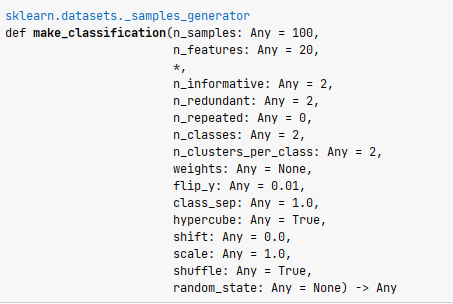
    
P.S.有些老版本也可能是这个from sklearn.datasets.samples_generator import make_classification，我在一些帖子里见过，但是自己用的时候会报错。

**make_classification**函数的参数信息：

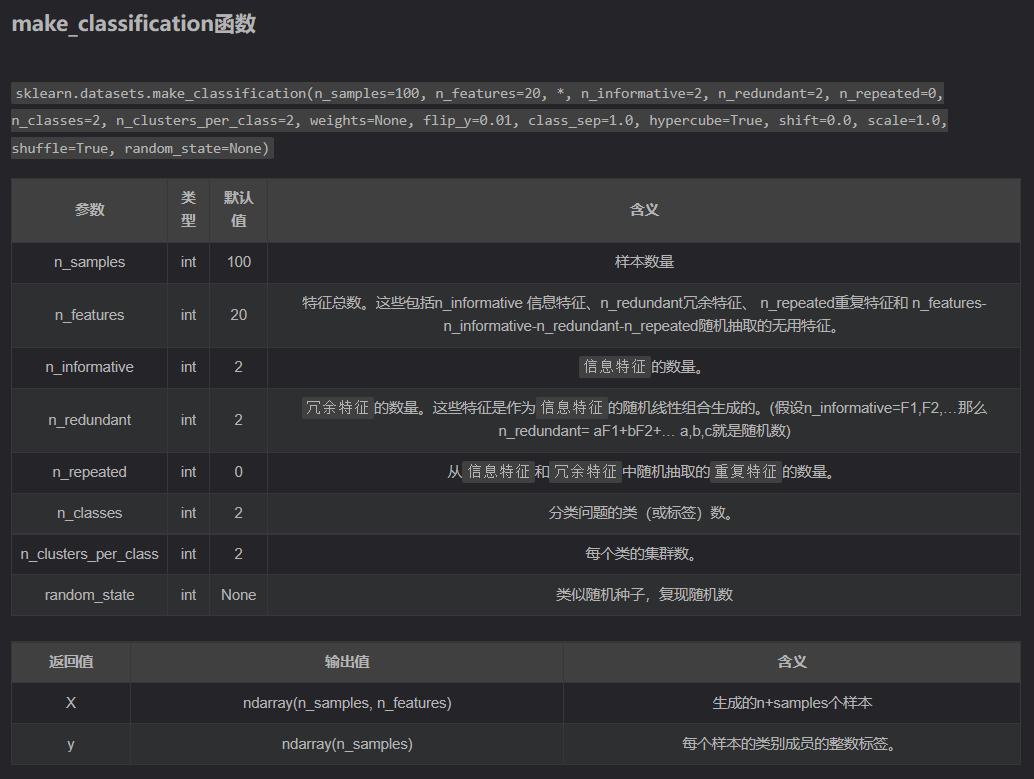

说明文档：https://blog.csdn.net/weixin_44225602/article/details/122726227

官方说明文档：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification

简单范例：

生成数据

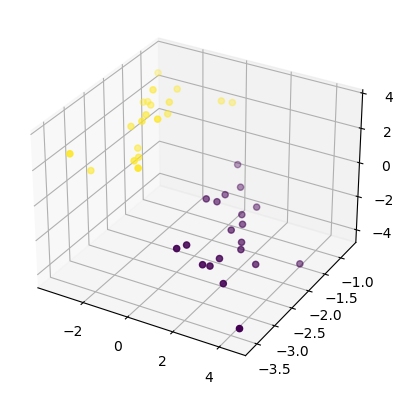

In [87]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 一些关键参数
n_s = 40
n_f = 3

# 生成数据
x, y = make_classification(n_samples=n_s,
                           n_features=n_f,
                           n_informative=n_f,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=None,
                           flip_y=0.01,
                           class_sep=2.0,
                           hypercube=True,
                           shift=0.0,
                           scale=1.0,
                           shuffle=True,
                           random_state=None)

# 显示
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=y)
plt.show()

LDA求$ \mathbf{w^*} $

In [88]:
# LDA包分类
clf = LinearDiscriminantAnalysis()
X_r = clf.fit(x, y)
w = X_r.coef_
w = np.mat(w)
w = w.T
w = w/np.sqrt(np.dot(w.T, w))
print(w)

[[-0.49764848]
 [-0.20509902]
 [ 0.84278134]]


原始代码求$ \mathbf{w^*} $

[ 1.46681253e+01 -6.36601028e-17 -1.06293588e-15]
[[ 0.49764848  0.10470362 -0.60706462]
 [ 0.20509902  0.99450238  0.44863017]
 [-0.84278134 -0.00147427 -0.65589902]]


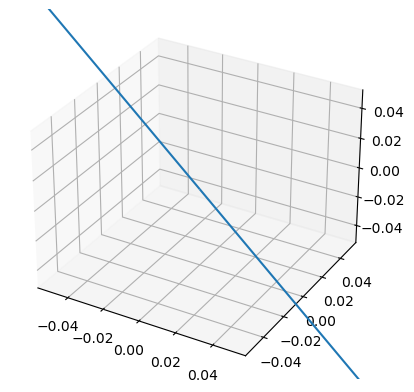

In [89]:
# 原始代码分类
# C1集合
C1 = np.empty(shape=(0, 3))
# C2集合
C2 = np.empty(shape=(0, 3))
for i in range(0, n_s):
    if y[i] == 0:
        C1 = np.vstack((C1, x[i, :]))
    else:
        C2 = np.vstack((C2, x[i, :]))

# 转置一下，因为我们之前的程序是一列对应一个数据点
C1 = np.mat(C1.T)
C2 = np.mat(C2.T)

# 计算参数
N_C1 = C1.shape[1]
N_C2 = C2.shape[1]

# 计算C1和C2的均值
x_C1 = np.sum(C1, axis=1) / N_C1
x_C2 = np.sum(C2, axis=1) / N_C2

# 计算S_c1和S_c1
S_C1 = np.zeros([C1.shape[0], C1.shape[0], N_C1])
for i in range(0, N_C1):
    S_C1[:, :, i] = np.dot((C1[:, i] - x_C1), (C1[:, i] - x_C1).T)
S_C2 = np.zeros([C2.shape[0], C2.shape[0], N_C2])
for j in range(0, N_C2):
    S_C2[:, :, j] = np.dot((C2[:, j] - x_C2), (C2[:, j] - x_C2).T)
S_C1 = np.sum(S_C1, axis=2) / N_C1
S_C2 = np.sum(S_C2, axis=2) / N_C2

# 计算S_b和S_w
S_b = np.dot((x_C1 - x_C2), (x_C1 - x_C2).T)
S_w = S_C1 + S_C2

# 计算(S_w)^(-1)*S_b
S = np.dot(np.linalg.inv(S_w), S_b)

# 特征值分解
eig_val, eig_vec = np.linalg.eig(S)

print(eig_val)
print(eig_vec)

plt.figure()
ax2 = plt.axes(projection='3d')
ax2.quiver([0, 0], [0, 0], [0, 0],
           [eig_vec[0, 0], w[0, 0]], 
           [eig_vec[1, 0], w[1, 0]], 
           [eig_vec[2, 0], w[2, 0]], 
           arrow_length_ratio=0.1)
plt.show()

我们自己的方法中，对应最大特征值的特征向量，和LDA求出的权重向量是一样的(各个分类都一样/或者相反)。

这样的结果应该可说明我们对LDA的理解和我们编写的程序问题都不太大，至少在简单情况下两者还比较一致。

如果大家觉得生成的数据分的不够开，也可以用**class_sep**参数来控制。

或者也可以用这个方法来生成

**sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)**

参数说明：

**n_samples**是待生成的样本的总数。

**n_features**是每个样本的特征数。

**centers**表示类别数。

**cluster_std**表示每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。

测试一下看看，同样的我们只分两类，也就是**centers=2**

导入库

In [73]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

设置参数，生成数据

In [74]:
# 一些关键参数
n_s = 40
n_f = 3

# 生成数据
x, y = make_blobs(n_samples=n_s, 
                  n_features=n_f, 
                  centers=2, 
                  cluster_std=1.0, 
                  center_box=(-10.0, 10.0), 
                  shuffle=True, 
                  random_state=None)

显示

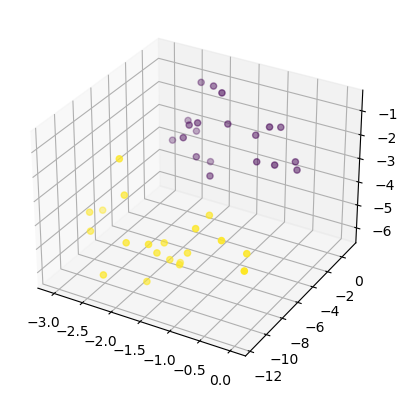

In [75]:
# 显示
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=y)
plt.show()

LDA求解

In [76]:
# LDA包求解
clf = LinearDiscriminantAnalysis()
X_r = clf.fit(x, y)
w = X_r.coef_
w = np.mat(w)
w = w.T
w = w/np.sqrt(np.dot(w.T, w))
print(w)

[[-0.18116975]
 [-0.93970431]
 [-0.29005747]]


原始程序求解

[2.63387726e+01 1.38744639e-17 9.11785307e-17]
[[-1.81169752e-01 -9.99995003e-01  9.99814045e-01]
 [-9.39704309e-01  6.57789886e-04 -4.46651783e-03]
 [-2.90057465e-01 -3.09226232e-03  1.87596859e-02]]


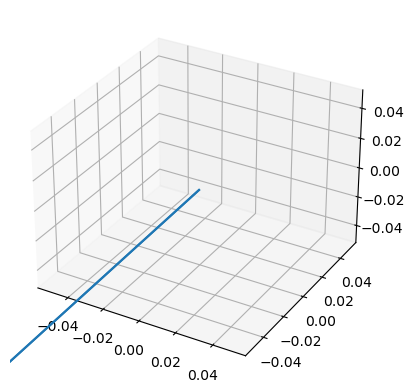

In [77]:
# 原始代码分类
# C1集合
C1 = np.empty(shape=(0, 3))
# C2集合
C2 = np.empty(shape=(0, 3))
for i in range(0, n_s):
    if y[i] == 0:
        C1 = np.vstack((C1, x[i, :]))
    else:
        C2 = np.vstack((C2, x[i, :]))

# 转置一下，因为我们之前的程序是一列对应一个数据点
C1 = np.mat(C1.T)
C2 = np.mat(C2.T)

# 计算参数
N_C1 = C1.shape[1]
N_C2 = C2.shape[1]

# 计算C1和C2的均值
x_C1 = np.sum(C1, axis=1) / N_C1
x_C2 = np.sum(C2, axis=1) / N_C2

# 计算S_c1和S_c1
S_C1 = np.zeros([C1.shape[0], C1.shape[0], N_C1])
for i in range(0, N_C1):
    S_C1[:, :, i] = np.dot((C1[:, i] - x_C1), (C1[:, i] - x_C1).T)
S_C2 = np.zeros([C2.shape[0], C2.shape[0], N_C2])
for j in range(0, N_C2):
    S_C2[:, :, j] = np.dot((C2[:, j] - x_C2), (C2[:, j] - x_C2).T)
S_C1 = np.sum(S_C1, axis=2) / N_C1
S_C2 = np.sum(S_C2, axis=2) / N_C2

# 计算S_b和S_w
S_b = np.dot((x_C1 - x_C2), (x_C1 - x_C2).T)
S_w = S_C1 + S_C2

# 计算(S_w)^(-1)*S_b
S = np.dot(np.linalg.inv(S_w), S_b)

# 特征值分解
eig_val, eig_vec = np.linalg.eig(S)

print(eig_val)
print(eig_vec)

plt.figure()
ax2 = plt.axes(projection='3d')
ax2.quiver([0, 0], [0, 0], [0, 0],
           [eig_vec[0, 0], w[0, 0]], 
           [eig_vec[1, 0], w[1, 0]], 
           [eig_vec[2, 0], w[2, 0]], 
           arrow_length_ratio=0.1)
plt.show()

还是一致的，我们心里可以稍微多一点点底气了。

这里也有其他的生成方法，就不一一介绍了：https://blog.csdn.net/qq_42991793/article/details/87617603

然后，我们上面的范例都只演示了向一条直线投影的情况，如果是类似三维降到二维的情况要怎么处理呢？

如果我们自己用**SVD**或者**eig**来求解，我们很容易得到多个 $ \mathbf{w} $ 向量，但是**LDA**包似乎只返回了一个向量。

**LDA**返回的向量数量受到**n_classes**和**n_features**的控制，两者中较小的数值再$ -1 $就是**LDA**返回的向量，我们上面的例子只分了两类（n_classes = 2），虽然维数很高，但是还是只会返回一个向量。

看来多类**LDA**的问题是没法避开的，不过我们后面再讨论，先请各位同学尝试实现一下二类**LDA**

好，那么一些基本情况的演示就到这里了，下面请同学们开始练习。

数据的维数通过n_freatures控制，数量通过n_samples控制

这几种情况，然后类别暂时只分两类就可以了，也就是n_classes = 2 / centers = 2。

我们先掌握两类LDA，多类LDA我们在后面的拓展部分中补充。

完成的同学或者遇到问题的同学请示意一下，我和助教老师会过去帮忙检查，确定各位同学都掌握了最基本的两类LDA。

# 2-补充

但是别忘了，我们前面还留下了一些疑问。

从上面的例子我们能够看出，当数据点很多的时候，**LDA**很有效。

但是当数据点减少的时候，**LDA**就会出现一些意料之外的情况，比如我们在前面讨论的，在二维情况下，我们的数据集$ \mathbf{C_1} $ 中只有一个点，而 $ \mathbf{C_2} $ 中只有两个点的极端情况。

这似乎有点不符合常理，给他5件事情他能做好，只给他安排3件事情的时候他反而手足无措了。

————————————————————————————————————————————————————————————————

我这里给出一个不太严谨的解释。

让我们先回顾一下目标函数的推导过程：

由这一步

$$ 
J(\mathbf{\mathbf{w}}) = \frac{(\bar{z}_1 - \bar{z}_2)^2}{(S_1 + S_2)}
$$ 

到这一步

$$ 
J(\mathbf{w}) = \frac{\mathbf{w^TS_bw}}{\mathbf{w^TS_ww}} 
$$

应该都是没什么问题的，毕竟分子分母都是标量。

但是，如果数据集 $ \mathbf{C_2} $ 中只有2个点，那此时他的类内方差矩阵 $ \mathbf{S_{C_2}} $ 必定不满秩。

而由于数据集 $ \mathbf{C_1} $ 中只有1个点，因此$ \mathbf{S_{C_1}} $ 是个零矩阵

所以
$$ 
\mathbf{S_w} = \mathbf{(S_{C_1} + S_{C_2})} 
$$

也是不满秩的，这就导致 $ J(\mathbf{\mathbf{w}}) $ 的分母项
$$ 
{\mathbf{w^TS_ww}} 
$$

不是非负二次型，导致$ J(\mathbf{w}) $很容易在非 0 点处变成无界函数，这个时候$ J(\mathbf{w}) $是没有最大值的，自然也就找不到令
$ J(\mathbf{w}) $ 最大的 $ \mathbf{w^*} $

简单一点说，就是当$ \mathbf{C_2} $ 中只有两个点的时候，我总能找到一个投影方向，让这两个点的投影重合，此时$ J(\mathbf{w}) $是无穷大，没有最大值，自然也没有令$ J(\mathbf{w}) $ 最大的 $ \mathbf{w^*} $。

# 2-小结

从上面的范例，我们基本上可以确定，我们理解**LDA**的思路，包括我们用原始代码去实现**LDA**功能的操作，问题都不太大。

至少在一些简单情况下，我们的理解没出什么问题。

而在求解方法上，我们还是采用基于矩阵特征值分解或者矩阵奇异值分解这些基本操作，这在单纯的**Python**操作和编程上，各位同学应该也没什么大疑问。

那么下面我们就拿出一些更具有实际意义的范例来测试一下或者说练习一下**LDA**的操作，可以吗？

————————————————————————————————————————————————————————————————

# 2-拓展

### 关于矩阵的奇异值分解。

奇异值分解可以看作矩阵特征值分解的推广。

矩阵可以看作一种线性变换，而矩阵的特征值以及对应的特征向量，能够表现出这个变换在哪些方向上“发力”，从而最直观的表示这个变换对于哪些方向起的作用较大，哪些方向影响较小。

只有方阵才有特征值，而实际情况中很多矩阵都不是方阵，但是我们又希望能够处理这种情况，所以才创造了**SVD**。

我们前面提到的很多和特征提取以及数据降维有关的操作，比如**PCA**和**LDA**都牵扯到了矩阵奇异值分解这个操作。

所以这里也简单介绍一下矩阵的奇异值分解，并且用一些简单的图片来演示一下**SVD**的实际作用。

首先我们回顾一下矩阵奇异值分解的数学概念：

奇异值分解(**Singular Value Decomposition**)，假设存在一个 $ m \times n $ 矩阵 $ \mathbf{A} $，那么矩阵 $ \mathbf{A} $的**SVD**为

$$
\mathbf{A} = \mathbf{U \Sigma V^{T}}
$$

其中，$ \mathbf{U} $ 是 $ m \times m $ 矩阵( $ m $ 阶方阵)，$ \mathbf{V} $ 是 $ n \times n $ 矩阵( $ n $ 阶方阵)，且都是都是酉矩阵，即满足

$$
\mathbf{U U^T} = \mathbf{I}\\
\mathbf{V V^T} = \mathbf{I}\\
$$

而$ \mathbf{U \Sigma V^{T}} $ 是 $ m \times n $ 矩阵，除了主对角线上的元素以外全为0，主对角线上的每个元素都称为奇异值。

下图可以很形象的看出上面**SVD**的定义：

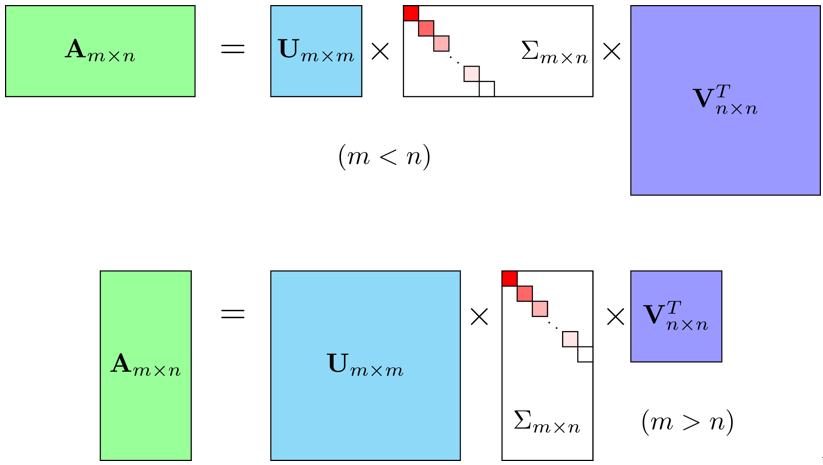

但是在实际应用中，由于奇异值衰减很快，差不多前10%的奇异值就占据了所有奇异值的99%以上，所以我们不需要把所有的奇异值都用上。

（这个情况不是绝对的，比如对于医学图像来说有时候就要很多奇异值才行）

这个时候就有

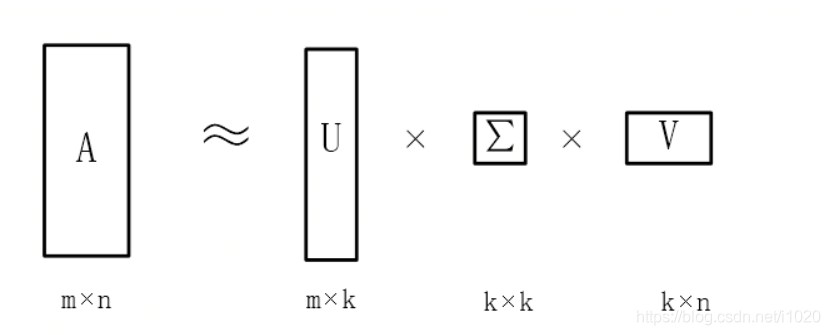

也就是说我们可以只用前面几个奇异值以及对应的左右奇异向量来构造一个与原始矩阵$ \mathbf{A} $非常接近的新矩阵，这个矩阵包含了原始矩阵$ \mathbf{A} $中的大部分重要信息。

————————————————————————————————————————————————————————————————

那么，已知一个$ m \times n $ 矩阵$ \mathbf{A} $，如何求**SVD**？

如果我们将$ \mathbf{A} $的转置$ \mathbf{A^T} $和$ \mathbf{A} $做矩阵左乘，那么会得到一个$ n \times n $方阵：

$$
\mathbf{A^TA}
$$

既然是方阵，那就可以进行特征值分解：

$$
(\mathbf{A^TA})\mathbf{v_i} = \lambda_i \mathbf{v_i}
$$

这样我们就可以得到矩阵$ \mathbf{A^TA} $的$ n $个特征值和对应的$ n $个特征向量$ v $了。将$ \mathbf{A^TA} $的所有特征向量张成一个$ n \times n $的矩阵$ \mathbf{V} $，就是公式里面的$ \mathbf{V}$矩阵。一般我们将$ \mathbf{V}$中的每个特征向量叫做$ \mathbf{A} $的右奇异向量。

同样的，由于矩阵乘法没有交换律，所以$ \mathbf{A} $的转置$ \mathbf{A^T} $右乘$ \mathbf{A} $则会得到一个$ m \times m $方阵：

$$
\mathbf{AA^T}
$$

然后特征值分解

$$
(\mathbf{AA^T})\mathbf{u_i} = \lambda_i \mathbf{u_i}
$$

这样我们就可以得到矩阵$ \mathbf{AA^T} $的$ m $个特征值和对应的$ m $个特征向量$ u $了。将$ \mathbf{AA^T} $的所有特征向量张成一个
$ m \times m $的矩阵$ \mathbf{U} $，就是公式里面的$ \mathbf{U} $矩阵。一般我们将$ \mathbf{U} $中的每个特征向量叫做$ \mathbf{A} $的左奇异向量。

求出$ \mathbf{U} $ 和 $ \mathbf{V} $ 之后，我们求奇异值矩阵 $ \mathbf{\Sigma} $

————————————————————————————————————————————————————————————————

由于$ \mathbf{\Sigma} $除了对角线上是奇异值其他位置都是0，那我们只需要求出每个奇异值$ \sigma $就可以了。

注意到

$$
\mathbf{A} = \mathbf{U \Sigma V^{T}}
$$

两边左乘$ \mathbf{V} $ 有

$$
\begin{aligned}
\mathbf{AV} &= \mathbf{U \Sigma V^{T}V} \\
\mathbf{AV} &= \mathbf{U \Sigma } \\
\end{aligned}
$$

由于$ \mathbf{\Sigma} $只在对角线上有非0元素，所以有

$$
\mathbf{Av_i} = \sigma_i\mathbf{u_i} \\
$$

故有

$$
\sigma_i = \frac{\mathbf{Av_i}}{\mathbf{u_i}}
$$

这样我们可以求出我们的每个奇异值$ \sigma_i $，进而求出整个奇异值矩阵$ \mathbf{\Sigma} $

但是在实际应用中，一般不用这种方法求奇异值，毕竟向量除法也很奇怪，容易出现特殊情况。

实际应用中一般用$ \mathbf{A^TA} $的特征值开方的方法求解奇异值，我们编程使用的时候记住结论就可以了。

更多证明：https://zhuanlan.zhihu.com/p/490838422

### SVD有啥用

这里举一个图像处理的例子




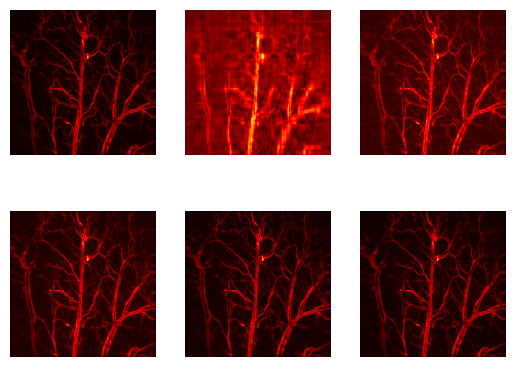

In [95]:
# 导入库
import struct
import numpy as np
import matplotlib.pyplot as plt

# 数据读取
binFile = open('101.dat', "rb")

# 创建一个数组来存储数据
PAM_data = np.zeros([1, 500*1000])

# 转换，这里d表示'double'，是长双精度浮点数的意思。
# 如果二进制文件的数据类型有变，读取时也要发生改变，否则数据会发生错误。
# 各位同学可以看看修改之后会是什么样
for i in range(0, 500*1000):
    data = binFile.read(8)
    PAM_data[0, i] = struct.unpack('d', data)[0]

# 关闭文件以防篡改
binFile.close()

# 变换维数
MAP = np.reshape(PAM_data, (500, 1000))
MAP = MAP[:, 500:1000]

# SVD分解
U, sigma, V = np.linalg.svd(MAP)

# 重构
MAP_rec_10 = np.dot(np.dot(U[:, 0:10],np.diag(sigma[0:10])), V[0:10, :])
MAP_rec_50 = np.dot(np.dot(U[:, 0:50],np.diag(sigma[0:50])), V[0:50, :])
MAP_rec_100 = np.dot(np.dot(U[:, 0:100],np.diag(sigma[0:100])), V[0:100, :])
MAP_rec_200 = np.dot(np.dot(U[:, 0:200],np.diag(sigma[0:200])), V[0:200, :])
MAP_rec_300 = np.dot(np.dot(U[:, 0:300],np.diag(sigma[0:300])), V[0:300, :])

# 查看数据
plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.subplot(231)
plt.imshow(MAP, cmap='hot', aspect=1)
plt.axis('off')
plt.subplot(232)
plt.imshow(MAP_rec_10, cmap='hot', aspect=1)
plt.axis('off')
plt.subplot(233)
plt.imshow(MAP_rec_50, cmap='hot', aspect=1)
plt.axis('off')
plt.subplot(234)
plt.imshow(MAP_rec_100, cmap='hot', aspect=1)
plt.axis('off')
plt.subplot(235)
plt.imshow(MAP_rec_200, cmap='hot', aspect=1)
plt.axis('off')
plt.subplot(236)
plt.imshow(MAP_rec_300, cmap='hot', aspect=1)
plt.axis('off')
plt.show()

可见，经过上面的处理，我们只用了一部分奇异值和左右奇异向量，就保留了原始图片中的大部分信息。

当然，对于医学图像数据情况可能会复杂很多，比如这幅图的奇异值要求到前200才能勉强占据80%的权重。

各位同学可以试试看更换其他的图片处理一下。

相比于原图像，处理后的图像肯定损失了一部分信息，但是由于最主要的部分得到了保留，所以我们处理起来的难度和运算量就小了很多。

对于图象是这样，对于其他数据也是这样，因此SVD在特征提取和数据降维操作中才应用广泛。

# 2-拓展

### LDA进阶-多类LDA

检验自己是否理解一个理论或者一种方法，还有一个好办法是根据自己的理解进行一些简单的推理和论证，并且用实际测试来验证一下我们自己的推论是否正确。

比如我们在前面的推导过程中，只展示了两类数据的情况，但是如果我的数据集有三类呢？或者更多类别呢？

在数学上，由“2”到“3”其实是一个非常复杂的过程。

举一个大家都能接受的例子：

二体问题，也就是自由无界空间中，两个质量相同或相近的天体在给定初始位置与速度的情况下的运动轨迹问题是有定解的，只要初始条件确定，我就可以预测任意时刻这两个天体的位置和速度，虽然有偏差，但是这个偏差可以接受。

然而到了三体问题，就一下变成混沌系统了，即使初始条件偏差一点点，最终结果也可能完全不同。

有兴趣的同学可以自己试试看用python代码编一下模拟二体和三体问题。

其实我想用这个当Lecture 9 的作业的，能练习不少东西，但是我上完了Lecture 9 才想到。

————————————————————————————————————————————————————————————————

回到**LDA**，当我们要对三类数据进行降维的时候，也就是

数据集 $ S $，由 $ n $ 个 $ p $ 维向量 $ x^{N}_{i=1} $ 以及每个向量所对应的Label信息 $ y $ 所组成的集合

$$ 
\mathbf{S} = {\{}{(\mathbf{x_i},y_i)}{\}}^{N}_{i=1} 
$$  

其中

$$ 
\mathbf{x_i} \in R_p 
$$

为一个 $ p $ 维向量

$$    
\mathbf{x_i} =
  \left[ {\begin{array}{cc}
    a_{1i} \\
    a_{2i} \\
    a_{3i} \\
   \vdots   \\
    a_{pi} \\
  \end{array} } \right]
$$

而$ y_i $ 

$$ 
y_i \in {\{}{1, 2, 3}{\}}
$$   

这时有

$$ 
\mathbf{C_1} = {\{}{\mathbf{x_i} \in S|y_i = 1}{\}}^{N_{C_1}}_{i=1} 
$$  

以及

$$ 
\mathbf{C_2} = {\{}{\mathbf{x_i} \in S|y_i = 2}{\}}^{N_{C_2}}_{i=1} 
$$ 

以及

$$ 
\mathbf{C_3} = {\{}{\mathbf{x_i} \in S|y_i = 3}{\}}^{N_{C_3}}_{i=1} 
$$ 

我们继续按照上面的“类间大，类内小”的思路来解决这类问题，此时，类内方差我们应该没什么疑问，

问题在于类间方差，当数据集的类别从“2”变到“3”的时候，这个“间”就不太好确定了。

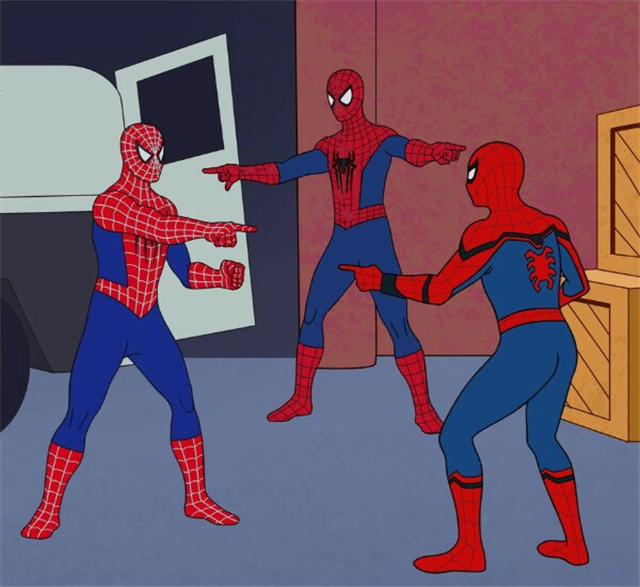

————————————————————————————————————————————————————————————————

那怎么办呢，我们只能重新定义一下类间方差的计算方式了。

我们先引入一个数学概念叫做散布矩阵（scatter matrix）

对于一个包含了$ n $个样本的$ m $维数据，可以用一个$ m \times n $ 矩阵 $ \mathbf{X} $来表示

$$
\mathbf{X} = \left[ {\begin{array}{c}
               \mathbf{x_1},
               \mathbf{x_2},
               \mathbf{x_3},
               \cdots,
               \mathbf{x_n}
         \end{array} } \right]
$$

整个样本的均值则可以表示为

$$
\mathbf{\overline{x}} = \frac{1}{n}\sum_{j=1}^{n}{\mathbf{x_j}}
$$

其中 $ \mathbf{x_j} $ 是 $ \mathbf{X} $的第 $ j $ 列

那么数据 $ \mathbf{X} $ 的散布矩阵为如下的 $ m $ 阶半正定方阵

$$
\mathbf{S} = \mathbf{\sum_{j=1}^{n}(x_j - \overline{x})(x_j - \overline{x})^T}
$$

也可以通过下面的方式计算 $ \mathbf{S} $

$$
\mathbf{S} = \mathbf{X}\mathbf{C_n}\mathbf{X^T}
$$

其中 $ \mathbf{C_n} $ 为 $ n $ 阶**Centering matrix**

$$
\mathbf{C_n} = \mathbf{I_n} - \frac{1}{n}\mathbf{J_n}
$$

而$ \mathbf{J_n} $ 为$ n $ 阶全$ 1 $矩阵

维基百科关于散布矩阵的定义：https://en.wikipedia.org/wiki/Scatter_matrix

————————————————————————————————————————————————————————————————

有了上面的数学概念我们可以计算全体数据的总体散步矩阵$ \mathbf{S_t} $ 

$$
\mathbf{S_t} = \mathbf{\sum_{j=1}^{n}(x_j - \mu)(x_j - \mu)^T}
$$

其中$ \mathbf{x_j} $ 遍历全体数据集，而 $ \mathbf{\mu} $ 是全体数据的均值向量。

以及各个类别数据$ \mathbf{C_i} $ 的类内散布矩阵$ \mathbf{S_{w_{i}}} $ 

$$
\mathbf{S_{w_i}} = \mathbf{\sum_{x_i \in C_i}(x_i - \mu_i)(x_i - \mu_i)^T}
$$

而全体数据的类内散布矩阵就是

$$
\mathbf{S_{w}} = \sum_{j=1}^{N} \mathbf{S_{w_i}}
$$

把所有$ \mathbf{N} $ 类数据的类内散布加起来。

总体散布矩阵$ \mathbf{S_t} $ 和类内散布矩阵$ \mathbf{S_w} $ 以及类间散布矩阵$ \mathbf{S_b} $ 之间存在这样的关系

$$
\mathbf{S_t} = \mathbf{S_w} + \mathbf{S_b}
$$

证明如下：

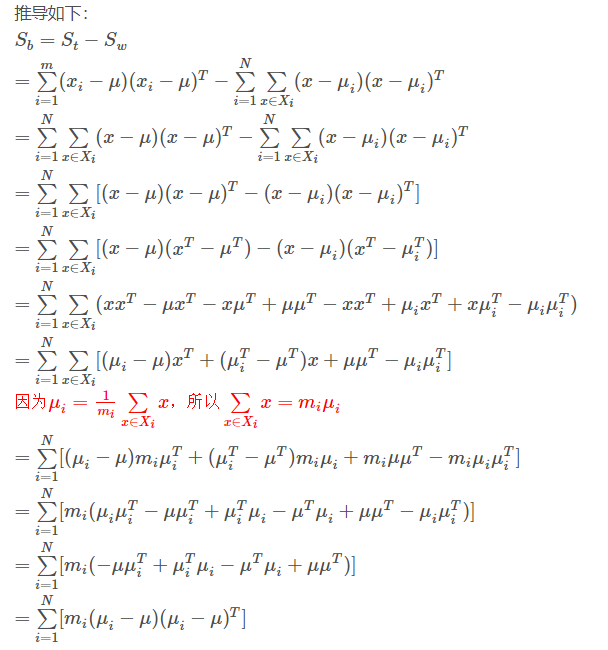

其中$ m_i $是第$ i $类数据中样本的数量。

所以我们就得到了多类情况下类间散布情况的描述，也就是类间散布矩阵$ \mathbf{S_b} $

评价函数的构造和前面一样，依然是

$$ 
J(\mathbf{w}) = \frac{\mathbf{w^TS_bw}}{\mathbf{w^TS_ww}} 
$$

结合矩阵求导，我们能够得到一样的结论。

需要注意的是，这个数学推导过程中没有计算各个样本的类内方差的平均值，当各个样本的数量都是一样的时候，平不平均都相差不大。

但是当样本数量不相等的时候，我们自己编写的程序和**LDA**的结果就会有偏差，各位同学可以尝试一下。

另外，每一类中至少需要有两个数据点，否则

$$
\mathbf{S_t} = \mathbf{S_w} + \mathbf{S_b}
$$

这个式子是不成立的，各位同学也可以试试看。

关于多类**LDA**的推导都是这种不平均的，所以这应该是更严谨的用法。

但是关于为什么不平均，这一点我确实还没找到很合理的解释，只能比较模糊的说多类数据分析时存在不同的标准。

比如数据集{1，1，1}和数据集{2，2，2，2，2，2}的均值如何考虑的问题，就有不同的方法，得到的结论也存在差别。

我们这里暂时就介绍比较常用的多类**LDA**方法。

不过不管怎么样，最后我们的计算依据还是

$$
{\lambda}\mathbf{w} = \mathbf{S_w}^{-1}\mathbf{S_bw} 
$$

区别只是 $ \mathbf{S_w}$ 和 $ \mathbf{S_b} $的计算方式要发生变化。

现在，我们明确了目标函数，可以测试一下看看了，检验自己的理解，也是检验自己的代码。

为了便于检验，可以让各个类别中的数据数量相等，再和**LDA**结果做对比。

————————————————————————————————————————————————————————————————

# 3-LDA的应用练习&作业

前面我们已经讲解了数学原理，并且进行了python代码实现以及简单的推论。

那么下面我们就开始一些的练习吧。

这部分我就不提供代码了（没问题吧），只提供问题描述和数据，请同学们试着解决一下这些问题。

实验报告请至少包含下面三个问题中的一个。

以Jupyter notebook形式提交。

截至日期为两周以后。

问题1：

鸢尾花iris分类（经典的LDA训练集）

鸢尾花数据集可能是模式识别、机器学习等领域里被使用最多的一个数据集了，很多教材用这份数据来做案例，很多工具，包括R、scikit-learn，都会自带这些数据集，而且说学术界很多论文也应用这份数据做实验，可见这份数据的重要意义。

鸢尾花数据集最初由Edgar Anderson 测量得到，而后在著名的统计学家和生物学家R.A Fisher于1936年发表的文章「The use of multiple measurements in taxonomic problems」中被使用，用其作为线性判别分析（Linear Discriminant Analysis）的一个例子，证明分类的统计方法，从此而被众人所知，尤其是在机器学习这个领域。

鸢尾花数据集共收集了三类鸢尾花，即Setosa鸢尾花、Versicolour鸢尾花和Virginica鸢尾花，每一类鸢尾花收集了50条样本记录，共计150条。

数据集包括4个属性，分别为花萼的长、花萼的宽、花瓣的长和花瓣的宽。

请各位同学根据以上数据对鸢尾花进行分类。

问题2：

宝可梦（Pokemon/口袋妖怪）分类

这个数据集是我在网上找到的，这个数据集包含来自所有七代宝可梦的所有802个宝可梦的信息。此数据集中包含的信息包括基础统计数据、针对其他类型的表现、身高、体重、分类、蛋步数、经验值、能力等。

原作者似乎想解决下面的一些问题

（1）是否有可能构建一个分类器来识别传奇种宝可梦

（2）宝可梦的身高和体重如何与其各种属性的基础值发生关联的？

（3）什么因素会影响体验增长和蛋步数？这些数量是否相关？

（4）哪种类型的宝可梦最强，哪种最弱？

（5）哪种类型的宝可梦最容易出传奇种？

（6）如何组建一支宝可梦梦之队？包含6只宝可梦，输出最高，但同时尽量不受对手的6只宝可梦克制或者影响。

显然上面的这些问题并不是都能用LDA解决的。

我个人也并不是很懂宝可梦，但是看着又似乎很有趣，所以就把所有问题都贴上来了。

如果对这个感兴趣的同学可以试试。

问题3：

西瓜数据集。

根据西瓜的含糖率和密度判断一个瓜好不好。

是从经典的周志华老师的《机器学习》课程中下载的数据集，网上流传甚广，各位同学可以试试看